# Fuzzy Logic Based Air Conditioner Built on Python 3 which adjusts its parameters for optimal power consumption

In [1]:
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import numpy as np

# Setting up Input Attributes

In [2]:
temp = ctrl.Antecedent(np.arange(16,31,1),'temp')
t_dif = ctrl.Antecedent(np.arange(-1,3,0.1),'t_dif')
d_point = ctrl.Antecedent(np.arange(10,18,1),'dew')
e_volt = ctrl.Antecedent(np.arange(130,220,10),'ev')

# Setting Input Membership Functions

In [3]:
#Membership Function values for temperature
temp['low'] = fuzzy.trapmf(temp.universe,[16,16,22,25])
temp['medium'] = fuzzy.trimf(temp.universe,[22,25,28])
temp['high'] = fuzzy.trapmf(temp.universe,[25,28,30,30])
#Membership Function values for temperature difference
t_dif['negative'] = fuzzy.trimf(t_dif.universe,[-1,-1,0])
t_dif['zero'] = fuzzy.trimf(t_dif.universe,[-0.5,0,0.5])
t_dif['positive'] = fuzzy.trimf(t_dif.universe,[0,1,2])
t_dif['large'] = fuzzy.trapmf(t_dif.universe,[1,2,3,3])
#Membership Function values for Dew Point
d_point['optimal'] = fuzzy.trapmf(d_point.universe,[10,10,11,14])
d_point['humid'] = fuzzy.trapmf(d_point.universe,[12,15,18,18])
#Membership Function values for Electric Volt
e_volt['low'] = fuzzy.trapmf(e_volt.universe,[130,130,160,180])
e_volt['high'] = fuzzy.trapmf(e_volt.universe,[170,190,220,220])

C:\Users\Naga Sri Ganesh\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


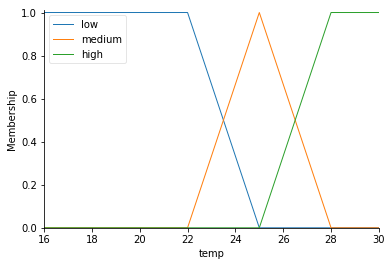

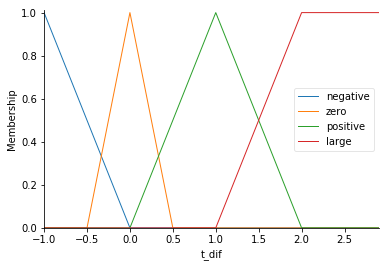

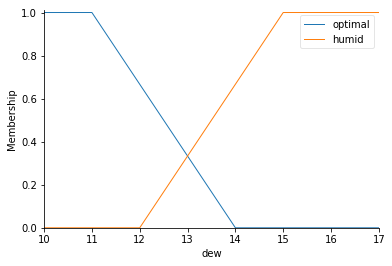

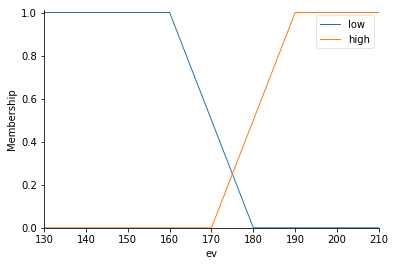

In [4]:
temp.view()
t_dif.view()
d_point.view()
e_volt.view()

# Setting Output Attributes

In [5]:
c_speed = ctrl.Consequent(np.arange(0,110,10),'comp_speed')
f_speed = ctrl.Consequent(np.arange(0,110,10),'fan_speed')
mo = ctrl.Consequent(np.arange(0,1.1,0.1),'mo')
f_dir = ctrl.Consequent(np.arange(0,100,10),'f_dir')

# Setting Output Membership Functions

In [6]:
#Membership Function Values for Compressor Speed
c_speed['low'] = fuzzy.trapmf(c_speed.universe,[0,0,30,50])
c_speed['medium'] = fuzzy.trimf(c_speed.universe,[40,60,80])
c_speed['fast'] = fuzzy.trapmf(c_speed.universe,[70,90,100,100])
#Membership Function Values for Fan Speed
f_speed['low'] = fuzzy.trapmf(f_speed.universe,[0,0,30,50])
f_speed['medium'] = fuzzy.trimf(f_speed.universe,[40,60,80])
f_speed['fast'] = fuzzy.trapmf(f_speed.universe,[70,90,100,100])
#Membership Function for Mode of Operation
mo['ac'] = fuzzy.trimf(mo.universe,[0,1,1])
mo['de'] = fuzzy.trimf(mo.universe,[0,0,1])
#Membership Function Values for Fan Direction
f_dir['towards'] = fuzzy.trapmf(f_dir.universe,[0,0,40,70])
f_dir['away'] = fuzzy.trapmf(f_dir.universe,[40,70,90,90])

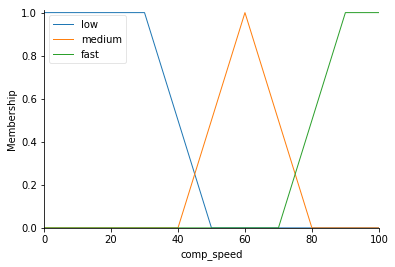

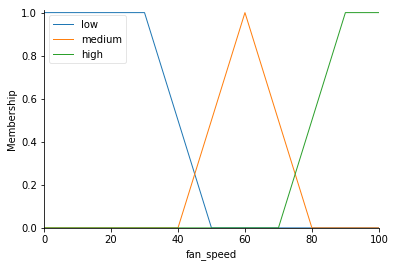

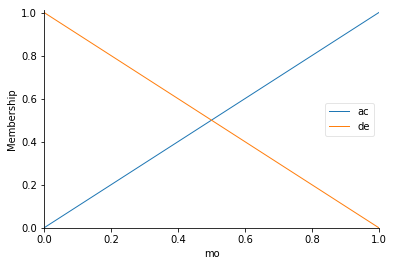

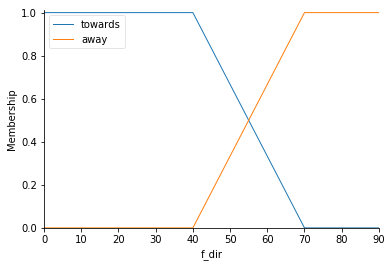

In [52]:
c_speed.view()
f_speed.view()
mo.view()
f_dir.view()

# Rules for Fuzzy

In [7]:
csr_list = []
rule_1 = ctrl.Rule(temp['low']&t_dif['negative']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_1)
rule_2 = ctrl.Rule(temp['medium']&t_dif['negative']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_2)
rule_3 = ctrl.Rule(temp['high']&t_dif['negative']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_3)
rule_4 = ctrl.Rule(temp['low']&t_dif['zero']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_4)
rule_5 = ctrl.Rule(temp['medium']&t_dif['zero']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_5)
rule_6 = ctrl.Rule(temp['high']&t_dif['zero']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_6)
rule_7 = ctrl.Rule(temp['low']&t_dif['positive']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_7)
rule_8 = ctrl.Rule(temp['medium']&t_dif['positive']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_8)
rule_9 = ctrl.Rule(temp['high']&t_dif['positive']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_9)
rule_10 = ctrl.Rule(temp['low']&t_dif['large']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_10)
rule_11 = ctrl.Rule(temp['medium']&t_dif['large']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_11)
rule_12 = ctrl.Rule(temp['high']&t_dif['large']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_12)
rule_13 = ctrl.Rule(temp['low']&t_dif['negative']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_13)
rule_14 = ctrl.Rule(temp['medium']&t_dif['negative']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_14)
rule_15 = ctrl.Rule(temp['high']&t_dif['negative']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_15)
rule_16 = ctrl.Rule(temp['low']&t_dif['zero']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_16)
rule_17 = ctrl.Rule(temp['medium']&t_dif['zero']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['medium'],mo['ac'],f_dir['towards']])
csr_list.append(rule_17)
rule_18 = ctrl.Rule(temp['high']&t_dif['zero']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_18)
rule_19 = ctrl.Rule(temp['low']&t_dif['positive']&d_point['optimal']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_19)
rule_20 = ctrl.Rule(temp['medium']&t_dif['positive']&d_point['optimal']&e_volt['high'],[c_speed['medium'],f_speed['medium'],mo['ac'],f_dir['towards']])
csr_list.append(rule_20)
rule_21 = ctrl.Rule(temp['high']&t_dif['positive']&d_point['optimal']&e_volt['high'],[c_speed['medium'],f_speed['medium'],mo['ac'],f_dir['towards']])
csr_list.append(rule_21)
rule_22 = ctrl.Rule(temp['low']&t_dif['large']&d_point['optimal']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_22)
rule_23 = ctrl.Rule(temp['medium']&t_dif['large']&d_point['optimal']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_23)
rule_24 = ctrl.Rule(temp['high']&t_dif['large']&d_point['optimal']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_24)
rule_25 = ctrl.Rule(temp['low']&t_dif['negative']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_25)
rule_26 = ctrl.Rule(temp['medium']&t_dif['negative']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_26)
rule_27 = ctrl.Rule(temp['high']&t_dif['negative']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_27)
rule_28 = ctrl.Rule(temp['low']&t_dif['zero']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_28)
rule_29 = ctrl.Rule(temp['medium']&t_dif['zero']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_29)
rule_30 = ctrl.Rule(temp['high']&t_dif['zero']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_30)
rule_31 = ctrl.Rule(temp['low']&t_dif['positive']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_31)
rule_32 = ctrl.Rule(temp['medium']&t_dif['positive']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_32)
rule_33 = ctrl.Rule(temp['high']&t_dif['positive']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_33)
rule_34 = ctrl.Rule(temp['low']&t_dif['large']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_34)
rule_35 = ctrl.Rule(temp['medium']&t_dif['large']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_35)
rule_36 = ctrl.Rule(temp['high']&t_dif['large']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_36)
rule_37 = ctrl.Rule(temp['low']&t_dif['negative']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['de'],f_dir['towards']])
csr_list.append(rule_37)
rule_38 = ctrl.Rule(temp['medium']&t_dif['negative']&d_point['humid']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['de'],f_dir['away']])
csr_list.append(rule_38)
rule_39 = ctrl.Rule(temp['high']&t_dif['negative']&d_point['humid']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['de'],f_dir['away']])
csr_list.append(rule_39)
rule_40 = ctrl.Rule(temp['low']&t_dif['zero']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['de'],f_dir['towards']])
csr_list.append(rule_40)
rule_41 = ctrl.Rule(temp['medium']&t_dif['zero']&d_point['humid']&e_volt['high'],[c_speed['medium'],f_speed['fast'],mo['de'],f_dir['towards']])
csr_list.append(rule_41)
rule_42 = ctrl.Rule(temp['high']&t_dif['zero']&d_point['humid']&e_volt['high'],[c_speed['medium'],f_speed['medium'],mo['de'],f_dir['towards']])
csr_list.append(rule_42)
rule_43 = ctrl.Rule(temp['low']&t_dif['positive']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_43)
rule_44 = ctrl.Rule(temp['medium']&t_dif['positive']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_44)
rule_45 = ctrl.Rule(temp['high']&t_dif['positive']&d_point['humid']&e_volt['high'],[c_speed['medium'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_45)
rule_46 = ctrl.Rule(temp['low']&t_dif['large']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_46)
rule_47= ctrl.Rule(temp['medium']&t_dif['large']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_47)
rule_48 = ctrl.Rule(temp['high']&t_dif['large']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_48)


# Creating a Control System and Control System Simulation

In [8]:
ac_ctrl = ctrl.ControlSystem(csr_list)

In [9]:
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Testing

In [10]:
#Test 1
ac.input['temp']  = 17
ac.input['t_dif'] = -0.9
ac.input['dew'] = 11
ac.input['ev'] = 160
ac.compute()
print(ac.output['comp_speed'],ac.output['fan_speed'],ac.output['mo'],ac.output['f_dir'])

20.82926829268293 20.82926829268293 0.6636363636363637 70.9178082191781


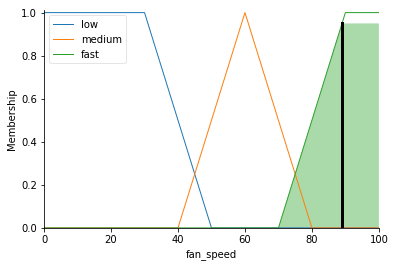

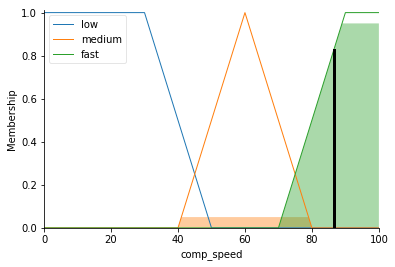

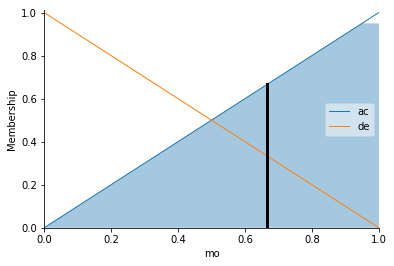

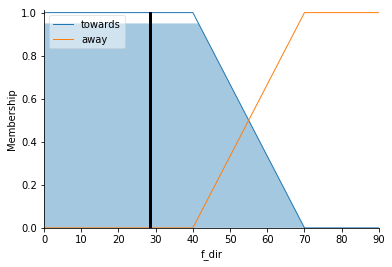

In [19]:
#Test Output
f_speed.view(sim=ac)
c_speed.view(sim=ac)
mo.view(sim=ac)
f_dir.view(sim=ac)

None


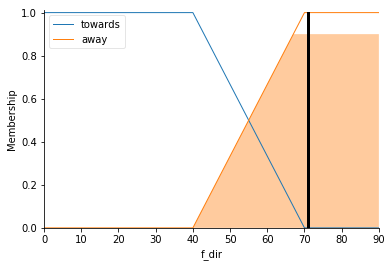

In [12]:
print(f_dir.view(sim=ac))

In [13]:
ac.output

OrderedDict([('comp_speed', 20.82926829268293),
             ('fan_speed', 20.82926829268293),
             ('mo', 0.6636363636363637),
             ('f_dir', 70.9178082191781)])

# Converting defuzzified output into fuzzy sets

In [14]:
def get_linguist(valmf,val,val_range):
    mf_keys = list(valmf.terms.keys())
    mf_value_list = []
    for i in range(len(mf_keys)):
        mf_value_list.append(skfuzzy.interp_membership(val_range,valmf[mf_keys[i]].mf,val))
    max_mf = max(mf_value_list)
    ling_key = ''
    for i in range(len(mf_keys)):
        if max_mf == mf_value_list[i]:
            ling_key = mf_keys[i]
            break
    return ling_key       

In [15]:
print(get_linguist(f_speed,ac.output['fan_speed'],np.arange(0,110,10)))

low


In [16]:
temp_range = np.arange(16,31,1)
tdif_range = np.arange(-1,3,0.1)
dew_range = np.arange(10,18,1)
ev_range = np.arange(130,220,10)
c_speed_range = np.arange(0,110,10)
f_speed_range = np.arange(0,110,10)
mo_range = np.arange(0,1.1,0.1)
dir_range = np.arange(0,100,10)

In [17]:
temp_list = []
tdif_list = []
dew_list = []
ev_list = []
temp_list.append(np.random.randint(low=16,high = 22))
temp_list.append(np.random.randint(low=23,high = 27))
temp_list.append(np.random.randint(low=27,high = 30))
tdif_list.append(float(np.random.uniform(low = -1,high = -0.6,size=(1,1))))
tdif_list.append(float(np.random.uniform(low = -0.5,high = 0.5,size=(1,1))))
tdif_list.append(float(np.random.uniform(low = 0.6,high = 1,size=(1,1))))
tdif_list.append(float(np.random.uniform(low = 1.1,high = 3,size=(1,1))))
dew_list.append(np.random.randint(low=10,high=13))
dew_list.append(np.random.randint(low=14,high=18))
ev_list.append(np.random.randint(low=130,high=160))
ev_list.append(np.random.randint(low=170,high=220))
print(temp_list)
print(tdif_list)
print(dew_list)
print(ev_list)

[21, 23, 29]
[-0.7141799836226982, 0.026453927721702297, 0.7402077551867778, 1.9497838120441893]
[12, 17]
[137, 207]


# Displaying Crisp Data

In [280]:
print('temp','   t_dif   ','   dew   ',' ev   ','   cs   ','   fs'   ,'     mo   ','     f_dir   ')
for i in range(len(temp_list)):
    for j in range(len(tdif_list)):
        for k in range(len(dew_list)):
            for p in range(len(ev_list)):
                ac.input['temp'] = temp_list[i]
                ac.input['t_dif'] = tdif_list[j]
                ac.input['dew'] = dew_list[k]
                ac.input['ev'] = ev_list[p]
                ac.compute()
                print(temp_list[i],tdif_list[j],dew_list[k],ev_list[p],ac.output['comp_speed'],ac.output['fan_speed'],ac.output['mo'],ac.output['f_dir'])

temp    t_dif       dew     ev       cs       fs      mo         f_dir   
17 -0.6424474663968678 10 131 21.945626034319314 21.945626034319314 0.6352759074089742 69.43489608227443
17 -0.6424474663968678 10 203 21.945626034319314 21.945626034319314 0.6352759074089742 69.43489608227443
17 -0.6424474663968678 17 131 21.945626034319314 21.945626034319314 0.6352759074089742 69.43489608227443
17 -0.6424474663968678 17 203 87.92045256706618 87.92045256706618 0.36472409259102573 30.4380532124438
17 0.05816946803726719 10 131 20.897856237209282 20.897856237209282 0.6626252572554866 70.83055864963121
17 0.05816946803726719 10 203 23.791040607039832 88.8033621721415 0.6626252572554866 28.88857144127416
17 0.05816946803726719 17 131 20.897856237209282 20.897856237209282 0.6626252572554866 70.83055864963121
17 0.05816946803726719 17 203 88.80336217214152 88.80336217214152 0.34106377158132634 28.88857144127416
17 0.694426506383661 10 131 21.714535660477434 21.714535660477434 0.64282652784199 69.75135

# Displaying Fuzzy Data 

In [18]:
print('Linguistic Values\n')
print('TEMP','T_DIF',' DEW ','EV',' CS ','FS',' MO',' F_DIR')
print('\n')
for i in range(len(temp_list)):
    for j in range(len(tdif_list)):
        for k in range(len(dew_list)):
            for p in range(len(ev_list)):
                ac.input['temp'] = temp_list[i]
                ac.input['t_dif'] = tdif_list[j]
                ac.input['dew'] = dew_list[k]
                ac.input['ev'] = ev_list[p]
                ac.compute()
                temp_ling = get_linguist(temp,temp_list[i],temp_range)
                tdif_ling = get_linguist(t_dif,tdif_list[j],tdif_range)
                dew_ling = get_linguist(d_point,dew_list[k],dew_range)
                ev_ling = get_linguist(e_volt,ev_list[p],ev_range)
                cs_ling = get_linguist(c_speed,ac.output['comp_speed'],c_speed_range)
                fs_ling = get_linguist(f_speed,ac.output['fan_speed'],f_speed_range)
                mo_ling = get_linguist(mo,ac.output['mo'],mo_range)
                dir_ling = get_linguist(f_dir,ac.output['f_dir'],dir_range)
                print(temp_ling,tdif_ling,dew_ling,ev_ling,cs_ling,fs_ling,mo_ling,dir_ling)


Linguistic Values

TEMP T_DIF  DEW  EV  CS  FS  MO  F_DIR


low negative optimal low low low ac away
low negative optimal high low low ac away
low negative humid low low low ac away
low negative humid high fast fast de towards
low zero optimal low low low ac away
low zero optimal high low fast ac towards
low zero humid low low low ac away
low zero humid high fast fast de towards
low positive optimal low low low ac away
low positive optimal high fast fast ac towards
low positive humid low low low ac away
low positive humid high fast fast ac towards
low large optimal low low low ac away
low large optimal high fast fast ac towards
low large humid low low low ac away
low large humid high fast fast ac towards
low negative optimal low low low ac away
low negative optimal high low low ac away
low negative humid low low low ac away
low negative humid high medium medium de towards
low zero optimal low low low ac away
low zero optimal high low fast ac towards
low zero humid low low low ac away
l

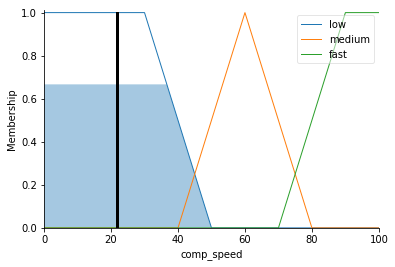

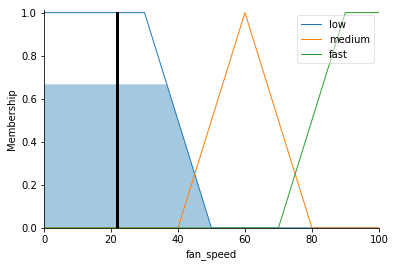

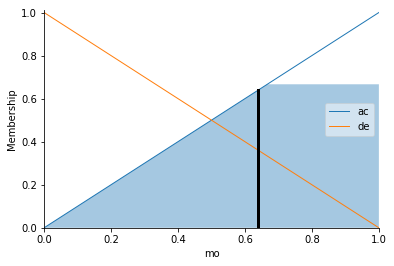

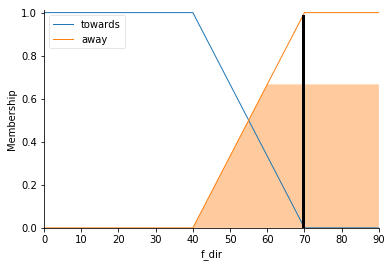

In [20]:
# Test 2
ac.input['temp'] = temp_list[0]
ac.input['t_dif'] = tdif_list[0]
ac.input['dew'] = dew_list[0]
ac.input['ev'] = ev_list[0]
ac.compute()
c_speed.view(sim = ac)
f_speed.view(sim = ac)
mo.view(sim = ac)
f_dir.view(sim=ac)

In [286]:
get_linguist(f_speed,ac.output['fan_speed'],f_speed_range)

'low'